In [6]:
using PorousMaterials, Plots, JSON, DataFrames, CSV, LaTeXStrings

In [7]:
sbmof1 = Crystal("SBMOF-1.cif")

Name: SBMOF-1.cif
Bravais unit cell of a crystal.
	Unit cell angles α = 90.000000 deg. β = 100.897000 deg. γ = 90.000000 deg.
	Unit cell dimensions a = 11.619300 Å. b = 5.566700 Å, c = 22.931200 Å
	Volume of unit cell: 1456.472102 Å³

	# atoms = 120
	# charges = 0
	chemical formula: Dict(:H => 8, :S => 1, :Ca => 1, :O => 6, :C => 14)
	space Group: P1
	symmetry Operations:
		'x, y, z'


In [8]:
sbmof2 = Crystal("SBMOF-2.cssr")

Name: SBMOF-2.cssr
Bravais unit cell of a crystal.
	Unit cell angles α = 82.990000 deg. β = 85.885000 deg. γ = 83.050000 deg.
	Unit cell dimensions a = 5.116100 Å. b = 10.823900 Å, c = 15.259800 Å
	Volume of unit cell: 831.155533 Å³

	# atoms = 63
	# charges = 0
	chemical formula: Dict(:H => 20, :Ca => 1, :O => 8, :C => 34)
	space Group: P1
	symmetry Operations:
		'x, y, z'


In [9]:
avogadro = 6.022e23                            # molecule/mol
sbmof1_unit_cell_volume = 1456.472102 * 1e-30  # m^3
sbmof2_unit_cell_volume = 831.155533 * 1e-30;   # m^3

In [10]:
forcefield = LJForceField("UFF", r_cutoff=12.8)
molecule = Molecule("Xe")

Molecule species: Xe
Center of mass (fractional coords): Cart([0.0; 0.0; 0.0])
Atoms:

	atom = Xe, x = [0.000, 0.000, 0.000]

In [11]:
df1 = CSV.File("data/sbmof1-xe-data.csv") |> 
     DataFrame |> 
     df -> transform(
        df, 
        "P(mbar)" => (x -> x / 1000) => :pressure,
        "Weight(mg)" => (x -> x / 1000) => :mass_xe,
        "PercentMass" => (x -> x / 100 / 131.293 * 1000) => :loading,
     )

,P(mbar),Weight(mg),PercentMass,pressure,mass_xe,loading
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.063,36.4861,4.0e-6,6.3e-5,0.0364861,3.04662e-7
2,0.222,36.4888,0.007839,0.000222,0.0364888,0.000597062
3,0.398,36.51,0.066458,0.000398,0.03651,0.00506181
4,0.58,36.5438,0.159596,0.00058,0.0365438,0.0121557
5,0.803,36.5881,0.281799,0.000803,0.0365881,0.0214634
6,0.985,36.6281,0.392194,0.000985,0.0366281,0.0298717
7,4.966,37.4443,2.64343,0.004966,0.0374443,0.201338
8,9.976,38.298,4.99974,0.009976,0.0382979,0.380808
9,19.99,39.4357,8.14745,0.01999,0.0394357,0.620555


In [12]:
sbmof1_pressures = df1.pressure   # bar
sbmof1_adsorptions = df1.loading;  # mmol/g

In [13]:
sbmof1_mass_ratio = 1 ./ (100 ./ df1.PercentMass .- 1)
sbmof1_coverage = sbmof1_mass_ratio*avogadro*crystal_density(sbmof1)*sbmof1_unit_cell_volume/131.293;

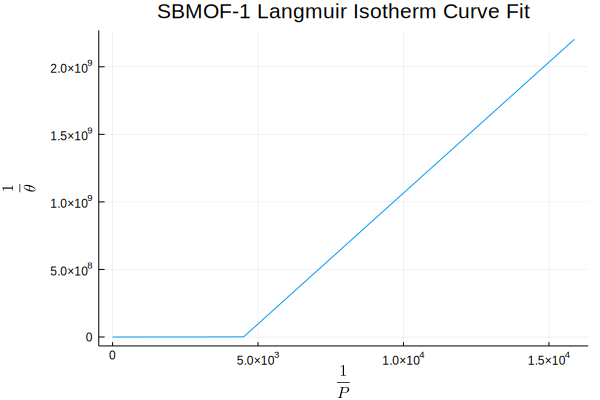

In [15]:
plot(
    1 ./ (sbmof1_pressures),
    1 ./ (sbmof1_coverage),
    legend=false,
    title="SBMOF-1 Langmuir Isotherm Curve Fit",
    xlabel=L"\frac{1}{P}",
    ylabel=L"\frac{1}{\theta}",
)

In [16]:
savefig("paper/fig/sbmof1-langmuir.png")

In [53]:
df2 = CSV.File("data/sbmof2-xe-data.csv") |> 
     DataFrame |> 
     df -> select(
        df,
        "P(torr)" => (x -> x / 750.062) => :pressure,
        "L(ccSTP/g)" => (x -> x / 22.4) => :loading
     )

,pressure,loading
,Float64,Float64
1,0.00406574,0.0423639
2,0.00609899,0.0637722
3,0.00812963,0.0850833
4,0.00915304,0.0957083
5,0.0101294,0.105825
6,0.0202933,0.210264
7,0.0300257,0.305586
8,0.0402655,0.402003
9,0.0492218,0.516198


In [54]:
sbmof2_pressures = df2.pressure   # bar
sbmof2_adsorptions = df2.loading;  # mmol/g

In [29]:
sbmof1_results = stepwise_adsorption_isotherm(
    sbmof1,
    molecule,
    298.,
    sbmof1_pressures,
    forcefield,
    eos=:PengRobinson,
    n_burn_cycles=5000,
    n_sample_cycles=5000,
);

Simulating (μVT) adsorption of Xe in SBMOF-1.cif at 298.000000 K and 0.000063 bar (bar) with UFF force field.
	# burn cycles: 5000
	# sample cycles: 5000
	PengRobinson equation of state fugacity = 0.000063 bar
	the crystal:
		replicated (3,5,2) for short-range cutoff of 12.800000 Å
		density [kg/m³]: 1698.6777753402391
		chemical formula: Dict(:H => 8, :S => 1, :Ca => 1, :O => 6, :C => 14)
		# atoms: 3600
		# point charges: 0
	the molecule:
		unique species: [:Xe]
		# atoms: 1
		# point charges: 0
	Markov chain proposals:
		probability of insertion: 0.350000
		probability of deletion: 0.350000
		probability of translation: 0.250000
		probability of rotation: 0.000000
		probability of reinsertion: 0.050000
	Block  1/5 statistics:
	# samples: 20000
	⟨N⟩ (molecules) = 0.759
	⟨U_gh, vdw⟩ (K) = -3247.6311015012475
	⟨U_gh, Coulomb⟩ (K) = 0.0
	⟨U_gg, vdw⟩ (K) = -4.090367695031489
	⟨U_gg, Coulomb⟩ (K) = 0.0
	⟨U⟩ (K) = -3251.721469196279
	Block  2/5 statistics:
	# samples: 20000
	⟨N⟩ (molecules

In [7]:
sbmof2_results = stepwise_adsorption_isotherm(
    sbmof2,
    molecule,
    298.,
    sbmof2_pressures,
    forcefield,
    eos=:PengRobinson,
    n_burn_cycles=5000,
    n_sample_cycles=5000,
);

Simulating (μVT) adsorption of Xe in SBMOF-2.cssr at 298.000000 K and 0.004066 bar (bar) with UFF force field.
	# burn cycles: 5000
	# sample cycles: 5000
	PengRobinson equation of state fugacity = 0.004065 bar
	the crystal:
		replicated (6,3,2) for short-range cutoff of 12.800000 Å
		density [kg/m³]: 1328.4023144484402
		chemical formula: Dict(:H => 20, :Ca => 1, :O => 8, :C => 34)
		# atoms: 2268
		# point charges: 0
	the molecule:
		unique species: [:Xe]
		# atoms: 1
		# point charges: 0
	Markov chain proposals:
		probability of insertion: 0.350000
		probability of deletion: 0.350000
		probability of translation: 0.250000
		probability of rotation: 0.000000
		probability of reinsertion: 0.050000
	Block  1/5 statistics:
	# samples: 20000
	⟨N⟩ (molecules) = 2.66955
	⟨U_gh, vdw⟩ (K) = -9433.795689341736
	⟨U_gh, Coulomb⟩ (K) = 0.0
	⟨U_gg, vdw⟩ (K) = -4.464460044801336
	⟨U_gg, Coulomb⟩ (K) = 0.0
	⟨U⟩ (K) = -9438.260149386537
	Block  2/5 statistics:
	# samples: 20000
	⟨N⟩ (molecules) = 3.

In [ ]:
sbmof1_sim_adsorptions = [r["⟨N⟩ (mmol/g)"] for r in sbmof1_results]

In [8]:
sbmof2_sim_adsorptions = [r["⟨N⟩ (mmol/g)"] for r in sbmof2_results];

In [48]:
sbmof1_sim_adsorptions = open("data/sbmof1-sim-pengrob.json", "r") do io
    return [r["⟨N⟩ (mmol/g)"] for r in JSON.parse(io)]
end;

In [49]:
sbmof2_sim_adsorptions = open("data/sbmof2-sim-pengrob.json", "r") do io
    return [r["⟨N⟩ (mmol/g)"] for r in JSON.parse(io)]
end;

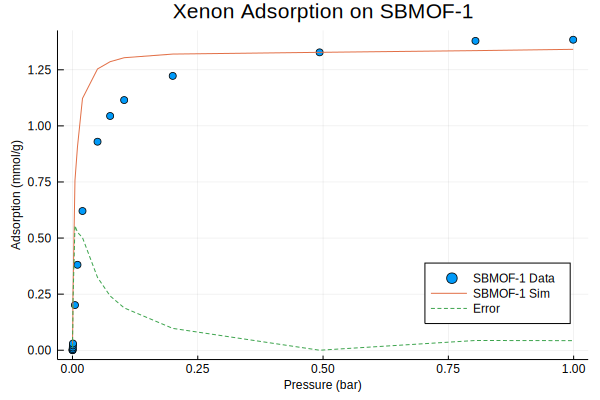

In [61]:
p1 = scatter(
    sbmof1_pressures,
    sbmof1_adsorptions,
    label="SBMOF-1 Data",
    title="Xenon Adsorption on SBMOF-1",
    xaxis=("Pressure (bar)", font(8)),
    yaxis=("Adsorption (mmol/g)", font(8)),
    legend=:bottomright,
)
plot!(p1, sbmof1_pressures, sbmof1_sim_adsorptions, label="SBMOF-1 Sim")
plot!(p1, sbmof1_pressures, abs.(sbmof1_sim_adsorptions-sbmof1_adsorptions), label="Error", linestyle=:dash)

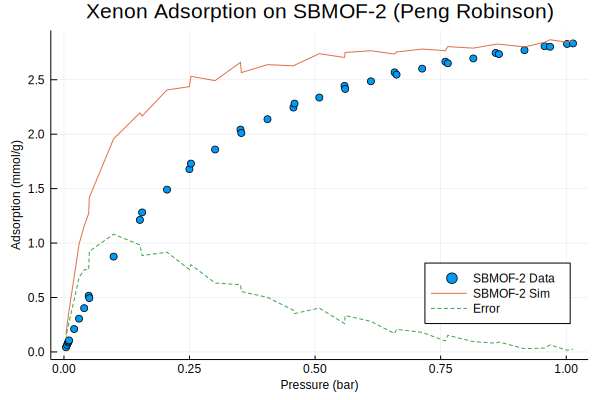

In [63]:
p2 = scatter(
    sbmof2_pressures,
    sbmof2_adsorptions,
    label="SBMOF-2 Data",
    title="Xenon Adsorption on SBMOF-2 (Peng Robinson)",
    xaxis=("Pressure (bar)", font(8)),
    yaxis=("Adsorption (mmol/g)", font(8)),
    legend=:bottomright,
)
plot!(p2, sbmof2_pressures, sbmof2_sim_adsorptions, label="SBMOF-2 Sim")
plot!(p2, sbmof2_pressures, abs.(sbmof2_sim_adsorptions-sbmof2_adsorptions), label="Error", linestyle=:dash)

In [62]:
savefig(p1, "paper/fig/sbmof1-pengrob-error.png")

In [64]:
savefig(p2, "paper/fig/sbmof2-pengrob-error.png")

In [33]:
open("data/sbmof1-sim-pengrob.json", "w") do io
    JSON.print(io, sbmof1_results, 4)
end

LoadError: UndefVarError: sbmof1_results not defined

In [34]:
open("data/sbmof2-sim-pengrob.json", "w") do io
    JSON.print(io, sbmof2_results, 4)
end